## Pre-processing of the Dataset "California house"

Goal:

- Create a new data set that can fit different kind of models, by removing the "NaN" and "String" variables.
- Get RMSE of different models to compare later with generated models

California house data set

Characteristics:
    - Number of instances: 1460
    - Additional informations available in data_description.txt
        
This is a copy of the Housing dataset:https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
It is used by students in machine learning looking to expand their skill set

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



## Exploring the Housing data set

### 1. Importing the data set

In [2]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
train_df = pd.read_csv('../Data/California_house/train.csv')

In [3]:
df = train_df
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

### 2. Data pre-processing

Counting the number of  missing values of each features

In [33]:
for col in df.columns:
    print(col + " : " + str(df[col].isna().sum()))

Id : 0
MSSubClass : 0
LotFrontage : 259
LotArea : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
MasVnrArea : 8
BsmtFinSF1 : 0
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 0
BsmtHalfBath : 0
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
TotRmsAbvGrd : 0
Fireplaces : 0
GarageYrBlt : 81
GarageCars : 0
GarageArea : 0
WoodDeckSF : 0
OpenPorchSF : 0
EnclosedPorch : 0
3SsnPorch : 0
ScreenPorch : 0
PoolArea : 0
MiscVal : 0
MoSold : 0
YrSold : 0
SalePrice : 0
MSZoning : 0
Street : 0
Alley : 0
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 0
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 0
BsmtCond : 0
BsmtExposure : 0
BsmtFinType1 : 0
BsmtFinType2 : 0
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 0
KitchenQua

Overall, there is few missing value compared to the globality of our dataset, thus we just drop those

In [50]:
df = df.dropna()

#### String values

We start by isolating string features

In [7]:
df = train_df
for x in df.columns:
    if (df[x].dtype == 'float64' or df[x].dtype == 'int64'):
        df = df.drop(x,axis=1)
    elif (x == 'SalePrice' or x == "Id"):
        df = df.drop(x,axis=1)
df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


We create a dictionary for every feature with each unique value as the key and un single number as the value. 

In [8]:
for col in df.columns:
    print(col)
    dic_of_value={}
    i = 0
    for x in pd.unique(df[col]):
        dic_of_value[x]=i
        i+=1
    df[col] = df[col].map(dic_of_value)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [9]:
df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,2,0,2,0,...,1,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,0,3,0,...,0,0,0,0,0,0,0,0,0,0


We replace those columns in the dataset

In [10]:
df = pd.concat([train_df.select_dtypes(np.number),df],axis=1)

In [11]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,0,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,0,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,1,1,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,0,0,0,0,0


### Exploratory Data Analysis

Visualizing the correlation matrix:

In [12]:
corr = df.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

GarageType     -0.255560
ExterQual      -0.265015
BsmtFinType1   -0.370971
HeatingQC      -0.427649
Foundation     -0.429678
Name: SalePrice, dtype: float64


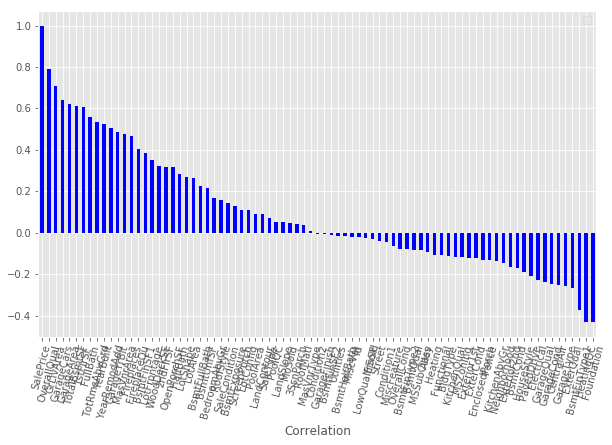

In [13]:
corr_SalePrice = corr.SalePrice.sort_values(ascending=False)
corr_SalePrice.plot(kind='bar', color='blue')
plt.xlabel('Correlation')
plt.ylabel('')
plt.xticks(rotation=75)
plt.legend([])
plt.show()

Let's take a look at which features have a correlation above 0.4

In [14]:
list_of_important_features = []
important_corr = corr['SalePrice']>0.4
for i in important_corr.index:
    list_of_important_features.append(i)
list_of_important_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual

Visualisation of the different range price

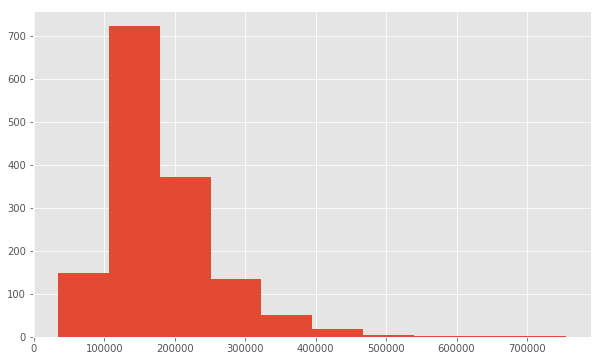

In [15]:
plt.hist(df.SalePrice)
plt.show()

Visualisation of the top 3 features

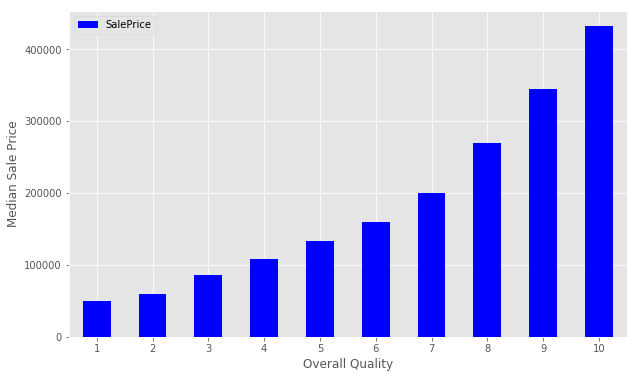

In [16]:
quality_pivot = df.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


The "OverallQual" is an ecxellent feature, but it is highly probable that is depends directly of many different other features

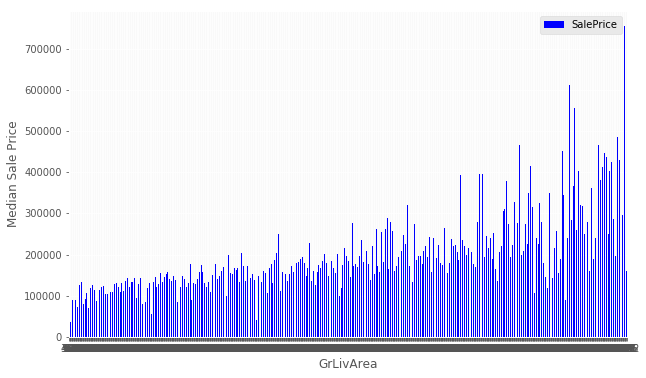

In [17]:
GrLivArea_pivot =  df.pivot_table(index='GrLivArea',
                  values='SalePrice', aggfunc=np.median)
GrLivArea_pivot.plot(kind='bar', color='blue')
plt.xlabel('GrLivArea')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

The "GrLivArea" don't seem to be a precise feature but it can give us a global idea

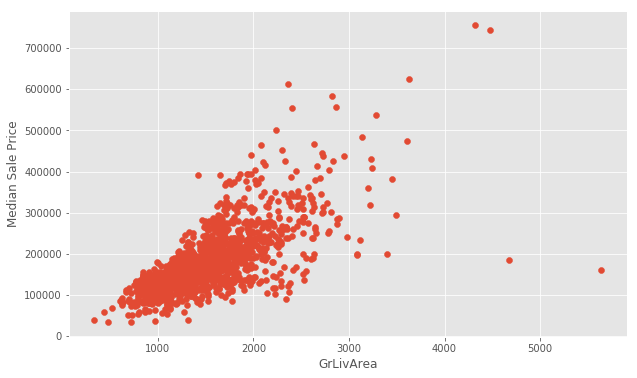

In [18]:
plt.scatter(x=df["GrLivArea"], y=df["SalePrice"])
plt.xlabel('GrLivArea')
plt.ylabel('Median Sale Price')
plt.show()

The "GrLivArea" is a good feature with a clear curve and few extreme values

### Creating our models

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

We unify the names of our columns

In [20]:
df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df.columns]

We define "SalePrice" as our feature to predict. Then, we split our data set in train and test data sets with a 33% ratio

In [48]:
X = df.drop(['SalePrice'],axis=1)
y = df.SalePrice
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33)

In [49]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

In [51]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)

In [52]:
decision_tree = DecisionTreeClassifier(max_leaf_nodes=100,max_depth=50)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

In [53]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.996005326231691

In [54]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [55]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(X_train,Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205896363816.1353, tolerance: 484670148.94005275
  positive)


Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('lasso',
                 Lasso(alpha=0.0005, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=1, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [56]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X_train,Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218967125471.46362, tolerance: 484670148.94005275
  positive)


Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True,
                            l1_ratio=0.9, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=3,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [57]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(X_train,Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=7.66799e-19): result may not be accurate.
  overwrite_a=False)


KernelRidge(alpha=0.6, coef0=2.5, degree=2, gamma=None, kernel='polynomial',
            kernel_params=None)

In [58]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt  
lasso_rmse = sqrt(mean_squared_error(Y_test,lasso.predict(X_test)))
knn_rmse = sqrt(mean_squared_error(Y_test,knn.predict(X_test)))
random_forest_rmse = sqrt(mean_squared_error(Y_test,random_forest.predict(X_test)))
gaussian_rmse = sqrt(mean_squared_error(Y_test,gaussian.predict(X_test)))
decision_tree_rmse = sqrt(mean_squared_error(Y_test,decision_tree.predict(X_test)))
ENet_rmse = sqrt(mean_squared_error(Y_test,ENet.predict(X_test)))
KRR_rmse = sqrt(mean_squared_error(Y_test,KRR.predict(X_test)))
GBoost_rmse = sqrt(mean_squared_error(Y_test,GBoost.predict(X_test)))

In [60]:
models = pd.DataFrame({
    'Model': ['KNN', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree','Lasso','ENet','KernelRidge','GBoost'],
    'RMSE': [knn_rmse ,random_forest_rmse , gaussian_rmse , decision_tree_rmse ,lasso_rmse ,ENet_rmse ,KRR_rmse ,GBoost_rmse]})
models.sort_values(by='RMSE', ascending=True)

,Model,RMSE
7,GBoost,36052.377156
5,ENet,50352.226141
4,Lasso,51375.436775
2,Naive Bayes,72280.226730
3,Decision Tree,72557.124163
0,KNN,72998.855645
1,Random Forest,76715.821612
6,KernelRidge,241767.474466


### Conclusion

By creating a leaderboard with model by their RMSE, we observe:

   - The Kernel Ridge model is doing extremly bad 
   - The average RMSE (removing the extreme ones) is around 60 000
   - GBoost have the best RMSE (36 052)

We save our processed data set to use it with our Auto-ML models

In [61]:
df.to_csv('../Data/California_house/no_string_no_nan.csv',index=False)